# Visualizing Geographic Data

## 1: Geographic Data

From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives. Raw geographic data like latitudes and longitudes are difficult to understand using the data charts and plots we've discussed so far. To explore this kind of data, you'll need to learn how to visualize the data on maps.

In this mission, we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the [openflights website](http://openflights.org/data.html). Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

- airlines.csv - data on each airline.

    - country - where the airline is headquartered.
    - active - if the airline is still active.

- airports.csv - data on each airport.

    - name - name of the airport.
    - city - city the airport is located.
    - country - country the airport is located.
    - code - unique airport code.
    - latitude - latitude value.
    - longitude - longitude value.

- routes.csv - data on each flight route.

    - airline - airline for the route.
    - source - starting city for the route.
    - dest - destination city for the route.
    
We can explore a range of interesting questions and ideas using these datasets:

- For each airport, which destination airport is the most common?
- Which cities are the most important hubs for airports and airlines?

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import data and name columns
airports = pd.read_csv("data/flight_data/airports.csv")
airports.columns = ["Airport ID", "Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitude",
                   "Timezone", "DST", "Tz database time zone", "Type", "Source"]

airlines = pd.read_csv("data/flight_data/airlines.csv")
airlines.columns = ["Airline ID", "Name", "Alias", "IATA", "ICAO", "Callsign", "Country", "Active"]

routes = pd.read_csv("data/flight_data/routes.csv")
routes.columns = ["Airline", "Airline ID", "Source airport", "Source airport ID", "Destination airport", 
                 "Destination airport ID", "Codeshare", "Stops", "Equipment"]

# Display columns
airports.head(2)
airlines.head(2)
routes.head(2)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports


,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N


,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2


## 2: Geographic Coordinate Systems

A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

<img src="https://s3.amazonaws.com/dq-content/latitude_longitude.png">

Here are the coordinates of 2 well known points of interest:

| Name   |      City      |  State |   Latitude | Longitude |
|:----------|:-------------:|:------:|:-----------:|:--------:|
| White House | Washington | DC | 38.898166 | -77.036441 |
| Alcatraz island | San Francisco | CA |37.827122 | -122.422934 |

In most cases, we want to visualize latitude and longitude points on two-dimensional maps. Two-dimensional maps are faster to render, easier to view on a computer and distribute, and are more familiar to the experience of popular mapping software like Google Maps. Latitude and longitude values describe points on a sphere, which is three-dimensional. To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system using a **map projection**.

A map projection transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps). We'll use the Mercator projection, because it is commonly used by popular mapping software.

## 3: Installing Basemap

Before we convert our flight data to Cartesian coordinates and plot it, let's learn more about the basemap toolkit. Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The [documentation for basemap](http://matplotlib.org/basemap/users/intro.html) provides a good high-level overview of what the library does:

    The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections.
    
Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly. Before we dive into how basemap works, let's get familiar with how to install it.

Installed basebap with: *conda install basemap*

The Basemap library has some external dependencies that Anaconda handles the installation for. To test the installation, run the following import code:

In [4]:
from mpl_toolkits.basemap import Basemap

## 4: Workflow With Basemap

Here's what the general workflow will look like when working with two-dimensional maps:

- Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
- Convert spherical coordinates to Cartesian coordinates using the basemap instance.
- Use the matplotlib and basemap methods to customize the map.
- Display the map.

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the basemap constructor and pass in values for the required parameters:

- projection: the map projection.
- llcrnrlat: latitude of lower left hand corner of the desired map domain
- urcrnrlat: latitude of upper right hand corner of the desired map domain
- llcrnrlon: longitude of lower left hand corner of the desired map domain
- urcrnrlon: longitude of upper right hand corner of the desired map domain

In [5]:
# Basemap constructor
m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

## 5: Converting From Spherical To Cartesian Coordinates

As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection we specified earlier. The constructor only accepts list values, so we'll need to use Series.tolist() to convert the longitude and latitude columns from the airports dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values.

In [6]:
x, y = m(airports["Longitude"].tolist(), airports["Latitude"].tolist())

## 6: Generating A Scatter Plot

Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of x and y coordinates, we use the basemap.scatter() method.

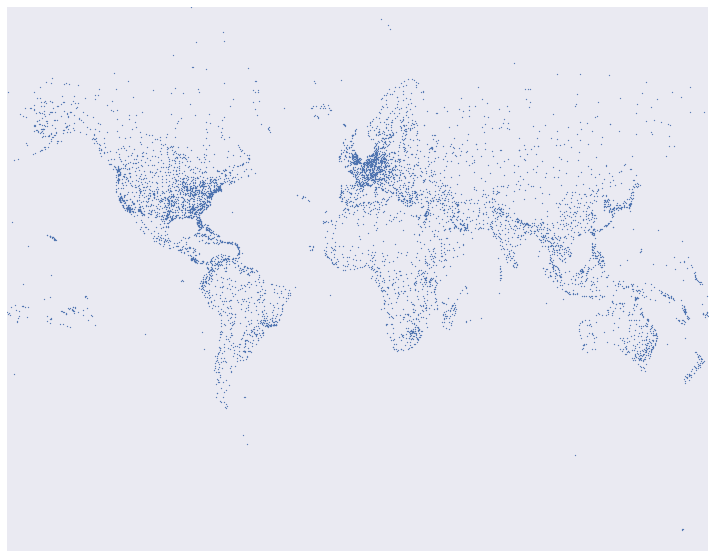

In [7]:
# Hide matplotlib axis.hold deprecation warning
import warnings
warnings.filterwarnings('ignore')

# Create scatter plot
plt.figure(figsize=(15,10))
m.scatter(x,y,s=1)

## 7: Customizing The Plot Using Basemap

You'll notice that the outlines of thee coasts for each continent are missing from the map above. We can display the coast lines using the basemap.drawcoastlines() method.

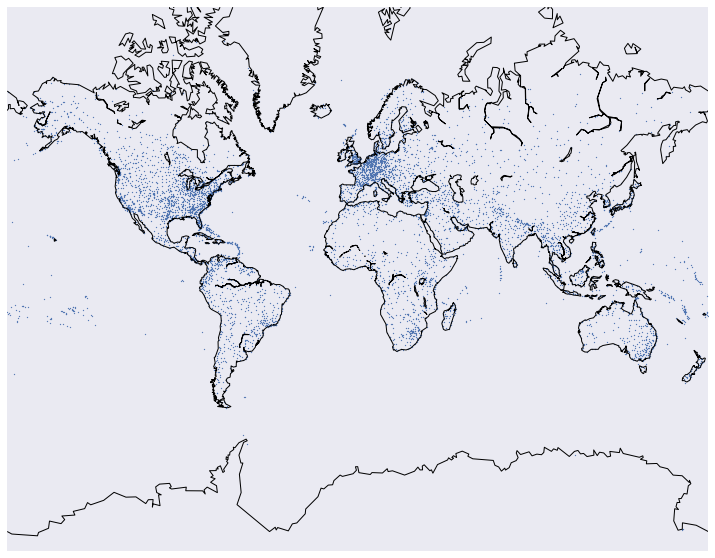

In [8]:
# Create scatter plot
plt.figure(figsize=(15,10))
m.scatter(x,y,s=1)
m.drawcoastlines()

## 8: Customizing The Plot Using Matplotlib

Because basemap uses matplotlib under the hood, we can interact with the matplotlib classes that basemap uses directly to customize the appearance of the map.

We can add code that:

- uses pyplot.subplots() to specify the figsize parameter
- returns the Figure and Axes object for a single subplot and assigns to fig and ax respectively
- use the Axes.set_title() method to set the map title

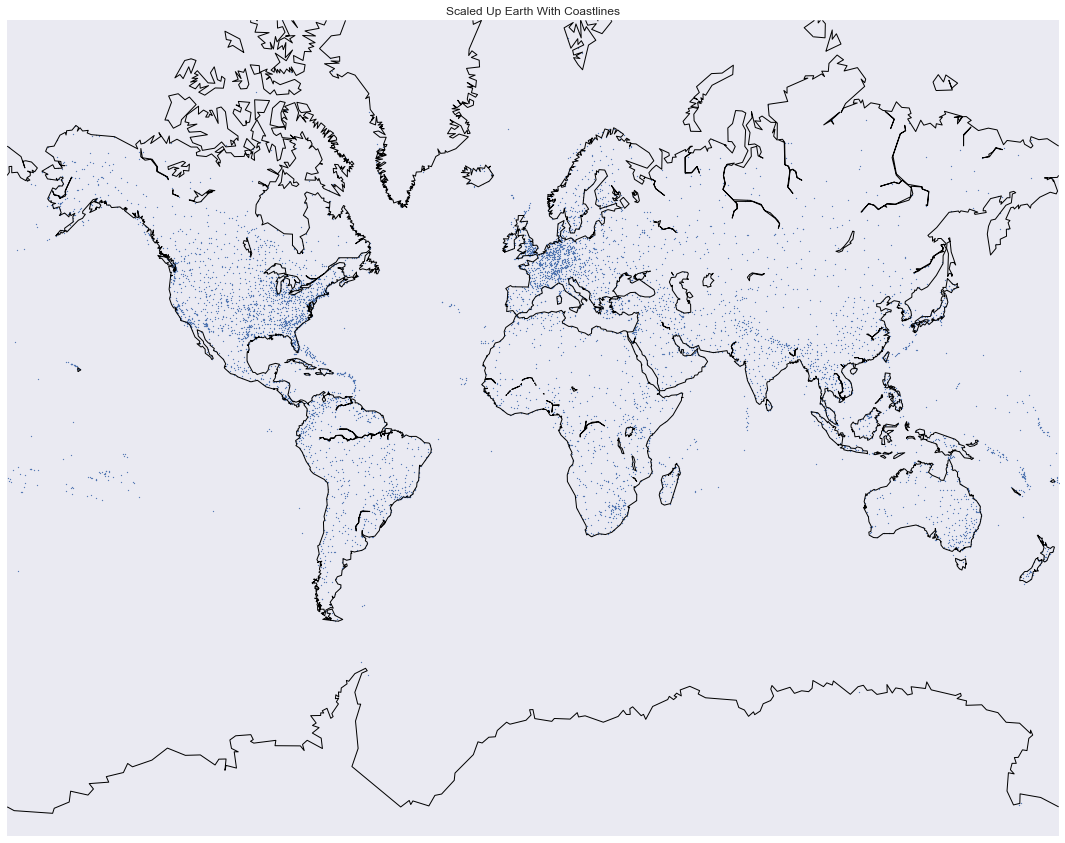

In [9]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title("Scaled Up Earth With Coastlines")
m.scatter(x,y,s=1)
m.drawcoastlines()

# 9: Introduction To Great Circles

To better understand the flight routes, we can draw great circles to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

<img src="https://s3.amazonaws.com/dq-content/great_circles.png">

On a two-dimensional map, the great circle is demonstrated as a line because it is projected from three-dimensional down to two-dimensional using the map projection. We can use these to visualize the flight routes from the routes dataframe. To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. While the routes dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (airports).

To make things easier, we've created a new CSV file called geo_routes.csv that contains the latitude and longitude values corresponding to the source and destination airports for each route. We've also removed some columns we won't be working with.

In [11]:
# data info
geo_routes = pd.read_csv("data/geo_routes.csv")
geo_routes.info()
geo_routes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


## 10: Displaying Great Circles  

We use the basemap.drawgreatcircle() method to display a great circle between 2 points. The basemap.drawgreatcircle() method requires four parameters in the following order:

- lon1 - longitude of the starting point.
- lat1 - latitude of the starting point.
- lon2 - longitude of the ending point.
- lat2 - latitude of the ending point.

The following code generates a great circle for the first three routes in the dataframe:

    m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
    m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
    m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)
    
Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the basemap.drawgreatcircle() method isn't able to create great circles properly when they go outside of the map boundaries. This is mentioned briefly in the documentation for the method:

    Note: Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.
    
Write a function, named create_great_circles() that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180. 

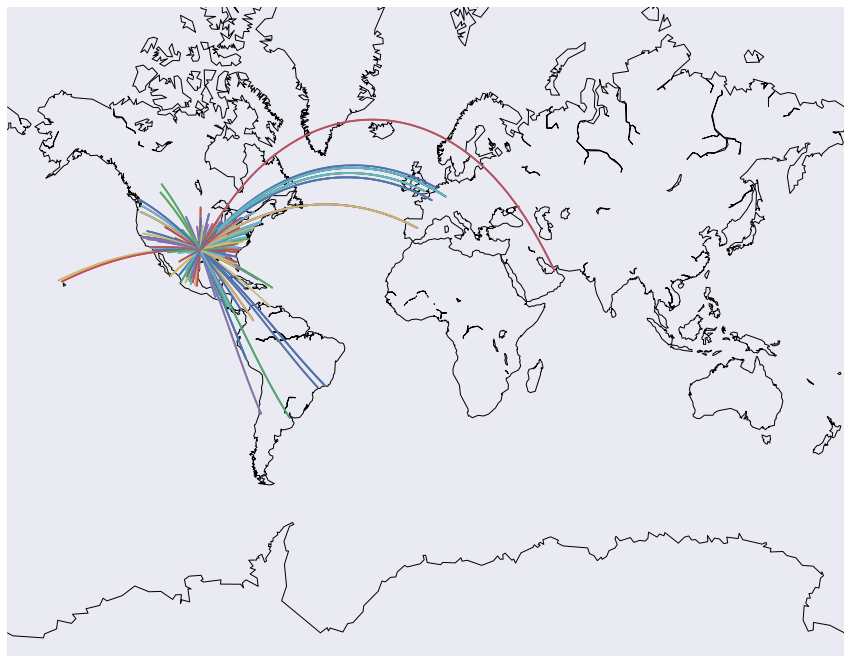

In [13]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

# great circles for abs. diff. in lat and long of < 180
def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw)
plt.show()